<a href="https://colab.research.google.com/github/VictorMadu/Coursera-Deep-Learning-Specialization-Course/blob/master/How-to-win-a-data-science-competition/Final_Project2/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount G-drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Download needed datasets from Kaggle

In [2]:
! pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"victorebube","key":"095cc61ec6ba8bdedda75f005e4d2305"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [29]:
! kaggle competitions download -c competitive-data-science-final-project

  0% 0.00/3.49k [00:00<?, ?B/s]
100% 3.49k/3.49k [00:00<00:00, 5.49MB/s]
  0% 0.00/2.91k [00:00<?, ?B/s]
100% 2.91k/2.91k [00:00<00:00, 3.25MB/s]
 93% 12.0M/12.9M [00:00<00:00, 126MB/s]
100% 12.9M/12.9M [00:00<00:00, 118MB/s]
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 141MB/s]
  0% 0.00/3.49k [00:00<?, ?B/s]
100% 3.49k/3.49k [00:00<00:00, 2.95MB/s]
  0% 0.00/469k [00:00<?, ?B/s]
100% 469k/469k [00:00<00:00, 145MB/s]
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 122MB/s]


In [15]:
! kaggle datasets list -s predict-future-sales-translated-dataset

ref                                                       title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
remisharoon/predict-future-sales-translated-dataset       Predict Future Sales - Translated Dataset           369KB  2020-03-04 11:30:16            179  
kashnitsky/jigsaw-multilingual-toxic-test-translated      Jigsaw multilingual toxic - test & val translated    25MB  2020-03-30 16:04:03            488  
davids1992/predictfuturesalesitemnametranslatedfasttext   Predict-Future-Sales-Item-name-translated-fasttext  717KB  2018-11-15 16:46:48             11  
miklgr500/jigsaw-train-multilingual-coments-google-api    Jigsaw Train Multilingual Coments (Google API)      500MB  2020-04-06 13:44:59            700  
ma7555/jigsaw-train-translated-yandex-api                 Jigsaw Train Trans

In [17]:
! kaggle datasets download -d remisharoon/predict-future-sales-translated-dataset 

  0% 0.00/369k [00:00<?, ?B/s]
100% 369k/369k [00:00<00:00, 52.2MB/s]


## Unzipping Storing datasets in appropiate directory

In [20]:
import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
import re
%matplotlib inline 

In [18]:
file_name = "/content/predict-future-sales-translated-dataset.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()

In [22]:
# create directory "future_sales in G-drive"

BASE_DIR = '/content/drive/My Drive'
PARENT_DIR = os.path.join(BASE_DIR, "future_sales")
os.makedirs(PARENT_DIR, exist_ok=True)

In [23]:
# move files to G-drive
files = ['item_categories.csv', "item_categories_en.csv", "item_cats.csv", "items.csv", "items_en.csv", "kaggle.json", "shops.csv", "shops_en.csv", "sales_train.csv.gz", "sample_submission.csv.gz", "test.csv.gz"]
for f in files:
  shutil.move(f, PARENT_DIR)

## Load required datasets

In [34]:
# Load files
sales_train = pd.read_csv(os.path.join(PARENT_DIR, 'sales_train.csv.gz'))
test = pd.read_csv(os.path.join(PARENT_DIR, 'test.csv.gz'))
items = pd.read_csv(os.path.join(PARENT_DIR, 'items.csv'))
item_categories = pd.read_csv(os.path.join(PARENT_DIR, 'item_categories.csv'))
shops = pd.read_csv(os.path.join(PARENT_DIR, 'shops.csv'))

# Files containing English translations from https://www.kaggle.com/c/competitive-data-science-predict-future-sales/discussion/133809
items_en = pd.read_csv(os.path.join(PARENT_DIR, 'items_en.csv'))
item_categories_en = pd.read_csv(os.path.join(PARENT_DIR, 'item_categories_en.csv'))
shops_en = pd.read_csv(os.path.join(PARENT_DIR, 'shops_en.csv'))

## Exploratory Data Analysis


In [36]:
sales_train.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0


In [37]:
sales_train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


## Checking for Outliners

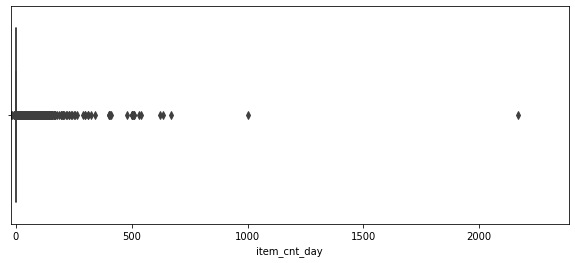

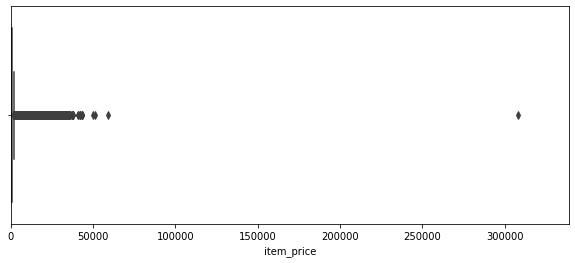

In [41]:
plt.figure(figsize=(10,4))
plt.xlim(sales_train['item_cnt_day'].min(), sales_train['item_cnt_day'].max()*1.1)
sns.boxplot(x=sales_train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(sales_train['item_price'].min(), sales_train['item_price'].max()*1.1)
sns.boxplot(x=sales_train.item_price)

We will remove outliners in the Feature Enginnering section

In [42]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,214200.0,107099.500000,61834.358168,0.0,53549.75,107099.5,160649.25,214199.0
shop_id,214200.0,31.642857,17.561933,2.0,16.00,34.5,47.00,59.0
item_id,214200.0,11019.398627,6252.644590,30.0,5381.50,11203.0,16071.50,22167.0


In [43]:
# Find differences between train and test
sales_train[['shop_id', 'item_id']].merge(test[['shop_id', 'item_id']],
                        indicator = True, how='left').loc[lambda x : x['_merge']!='both']. \
                        drop_duplicates(keep=False)

,shop_id,item_id,_merge
3,25,2554,left_only
6,25,2565,left_only
55,25,2522,left_only
73,25,2845,left_only
132,25,2149,left_only
...,...,...,...
2935670,25,7904,left_only
2935802,25,7583,left_only
2935804,25,7610,left_only
2935811,25,7635,left_only


In [46]:
# Find differences between test and train
test[['shop_id', 'item_id']].merge(sales_train[['shop_id', 'item_id']],
                        indicator = True, how='left').loc[lambda x : x['_merge']!='both']. \
                        drop_duplicates(keep=False)

,shop_id,item_id,_merge
13,5,5320,left_only
24,5,5268,left_only
96,5,5003,left_only
342,5,4874,left_only
414,5,5002,left_only
...,...,...,...
1327197,45,9500,left_only
1327198,45,16007,left_only
1327212,45,18027,left_only
1327222,45,16188,left_only


## Analysis on Items


In [48]:
items.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,22170.0,11084.500000,6400.072070,0.0,5542.25,11084.5,16626.75,22169.0
item_category_id,22170.0,46.290753,15.941486,0.0,37.00,40.0,58.00,83.0


In [49]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [54]:
items_en.head(30)

,item_name,item_id,item_category_id
0,! POWER IN glamor (PLAST.) D,0,40
1,! ABBYY FineReader 12 Professional Edition Ful...,1,76
2,*** In the glory (UNV) D,2,40
3,*** BLUE WAVE (Univ) D,3,40
4,*** BOX (GLASS) D,4,40
5,*** NEW American Graffiti (UNI) D,5,40
6,*** shot on goal (UNI) D,6,40
7,*** shot on goal-2 (UNI) D,7,40
8,*** Tea with Mussolini D,8,40
9,*** SHUGARLENDSKY EXPRESS (UNI) D,9,40


In [55]:
items_en.tail(30)

,item_name,item_id,item_category_id
22140,"I, Robot (BD)",22140,37
22141,"Я, СНОВА Я И МАМА",22141,40
22142,"Я, СНОВА Я И МАМА (BD)",22142,37
22143,I AM FRANKENSTEIN,22143,40
22144,"Я, ФРАНКЕНШТЕЙН (3D BD)",22144,38
22145,"I, Frankenstein (BD)",22145,37
22146,Я-ЛЕГЕНДА WB (BD),22146,37
22147,I-LEGEND WB (region),22147,40
22148,I-FOURTH WD,22148,40
22149,Я-ЧЕТВЕРТЫЙ WD (регион),22149,40


In [56]:
special_char = items_en['item_name'].str.split(' ').map(lambda x: x[0])
special_char.drop_duplicates().head()

0       !
2     ***
10      *
15     //
18      /
Name: item_name, dtype: object

In [83]:
def extract(row):
    m = re.match(r'^([*\!\/]+).*$', row)
    if m:
        return m.group(1)
    else:
        return ''

def clean(row):
    m = re.match(r'^[*\!\/]+(.*$)', row)
    if m:
        return m.group(1)
    else:
        return row

In [85]:
special_char =  [extract(row) for row in items['item_name'].values]
items['meta_item'] = special_char

cleaned_name =  [clean(row) for row in items['item_name'].values]
items['item_name'] = cleaned_name

In [86]:
items.head(10)

,item_name,item_id,item_category_id,meta_item
0,ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,
1,ABBYY FineReader 12 Professional Edition Full ...,1,76,
2,В ЛУЧАХ СЛАВЫ (UNV) D,2,40,
3,ГОЛУБАЯ ВОЛНА (Univ) D,3,40,
4,КОРОБКА (СТЕКЛО) D,4,40,
5,НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) D,5,40,
6,УДАР ПО ВОРОТАМ (UNI) D,6,40,
7,УДАР ПО ВОРОТАМ-2 (UNI) D,7,40,
8,ЧАЙ С МУССОЛИНИ D,8,40,
9,ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40,


In [87]:
item_categories_en.describe().T

,count,mean,std,min,25%,50%,75%,max
item_category_id,84.0,41.5,24.392622,0.0,20.75,41.5,62.25,83.0


In [88]:
item_categories_en.head(10)

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4
5,Accessories - PSVita,5
6,Accessories - XBOX 360,6
7,Accessories - XBOX ONE,7
8,Tickets (digits),8
9,Delivery of goods,9


In [89]:
item_categories_en.tail(10)

,item_category_name,item_category_id
74,Program - MAC (figure),74
75,Program - For home and office,75
76,Program - Home & Office (Digital),76
77,Program - Educational,77
78,Programs - Educational (figure),78
79,System Tools,79
80,Utilities - Tickets,80
81,Net carriers (spire),81
82,Net carriers (piece),82
83,batteries,83


#### The two cells above shows we may be able to obtain more informations if we split the item_category_name

In [91]:
item_categories_en['meta'] = item_categories_en['item_category_name'].str.split(' ').map(lambda x: x[0])
item_categories_en.meta.drop_duplicates().head(10)

0              PC
1     Accessories
8         Tickets
9        Delivery
10           Game
18          Games
24           Игры
32        Payment
37         Movies
39          Movie
Name: meta, dtype: object

#### Lets do the same for the Russian part

In [92]:
item_categories['meta_category'] = item_categories['item_category_name'].str.split(' ').map(lambda x: x[0])
item_categories.meta_category.drop_duplicates().head()

0             PC
1     Аксессуары
8         Билеты
9       Доставка
10       Игровые
Name: meta_category, dtype: object

In [93]:
item_categories.head(10)

,item_category_name,item_category_id,meta_category
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары
5,Аксессуары - PSVita,5,Аксессуары
6,Аксессуары - XBOX 360,6,Аксессуары
7,Аксессуары - XBOX ONE,7,Аксессуары
8,Билеты (Цифра),8,Билеты
9,Доставка товара,9,Доставка


## Analysis on Shops

In [94]:
shops.describe().T

,count,mean,std,min,25%,50%,75%,max
shop_id,60.0,29.5,17.464249,0.0,14.75,29.5,44.25,59.0


In [96]:
shops_en.head(30)

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 Franc",0
1,"! Yakutsk TC ""Central"" Franc",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TRC ""October-Kinomir""",3
4,"Volzhsky mall ""Volga Mall""",4
5,"Vologda SEC ""Marmalade""",5
6,"Voronezh (Plekhanovskaya, 13)",6
7,"Voronezh TRC ""Maksimir""",7
8,"Voronezh TRC City-Park ""City""",8
9,Itinerant trade,9


In [97]:
shops_en.shop_name.str[0].drop_duplicates()

0     !
2     A
3     B
4     V
9     I
10    Z
12    S
13    K
20    M
34    N
38    O
39    R
48    T
52    U
55    D
56    C
57    Y
Name: shop_name, dtype: object

#### Barely looking at the dataset we could notice that city names are put at the beginning of each shop_name, there are also cities with the ! special char


So we can create two more features, one will be the city names of each shop, anther will be whether a the special char ! is the beginning of any city name and lastly we will remove ! from the city names

In [98]:
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops['flag_city'] = (shops['city'].str[0] == '!')*1
shops['city'] = shops['city'].str.replace('!','')

In [99]:
shops.head(5)

,shop_name,shop_id,city,flag_city
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск,1
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск,1
2,"Адыгея ТЦ ""Мега""",2,Адыгея,0
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,0
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,0


In [100]:
# Save the data with their new features
items.to_pickle(os.path.join(PARENT_DIR, 'items.pkl'))
item_categories.to_pickle(os.path.join(PARENT_DIR, 'item_categories.pkl'))
shops.to_pickle(os.path.join(PARENT_DIR, 'shops.pkl'))                